# Simple Linear Regression

# Static Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)

In [4]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="m", marker="o", s=30)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    # plotting the regression line
    plt.plot(x, y_pred, color="g")

    # putting labels
    plt.xlabel("x")
    plt.ylabel("y")

    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = 1.2363636363636363  \ 
b_1 = 1.1696969696969697


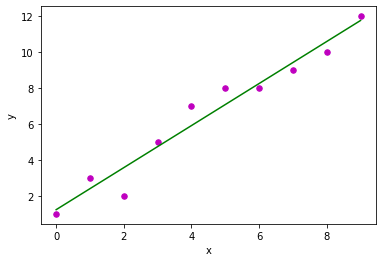

In [6]:
def main():
    # observations
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)


if __name__ == "__main__":
    main()

# From a Dataset

# Example 1

# Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Read the data

In [13]:
data = pd.read_csv("Advertising.csv")

In [14]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
data.drop(["Unnamed: 0"], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Simple Linear Regression

# Modelling

For simple linear regression, let’s consider only the effect of TV ads on sales. Before jumping right into the modelling, let’s take a look at what the data looks like.

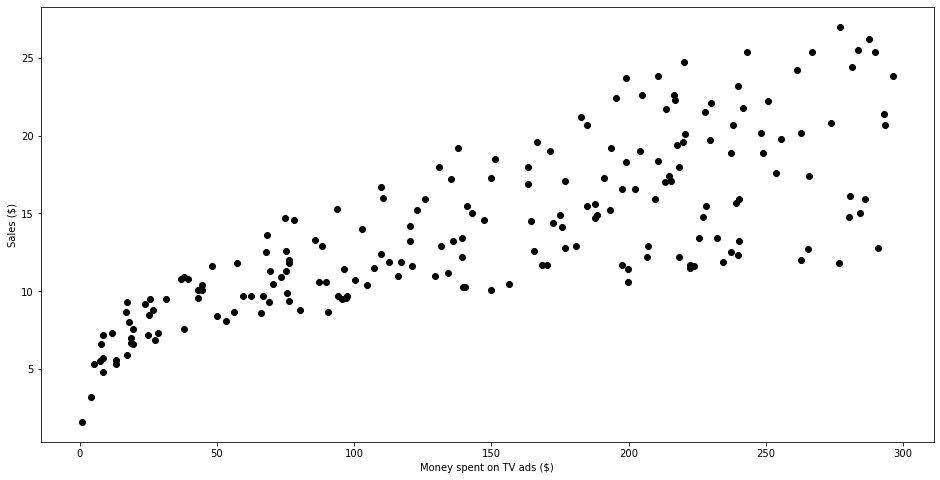

In [16]:
plt.figure(figsize=(16, 8))
plt.scatter(data["TV"], data["sales"], c="black")
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [19]:
X = data["TV"].values.reshape(-1, 1)
y = data["sales"].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
print(
    "The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0])
)

The linear model is: Y = 7.0326 + 0.047537X


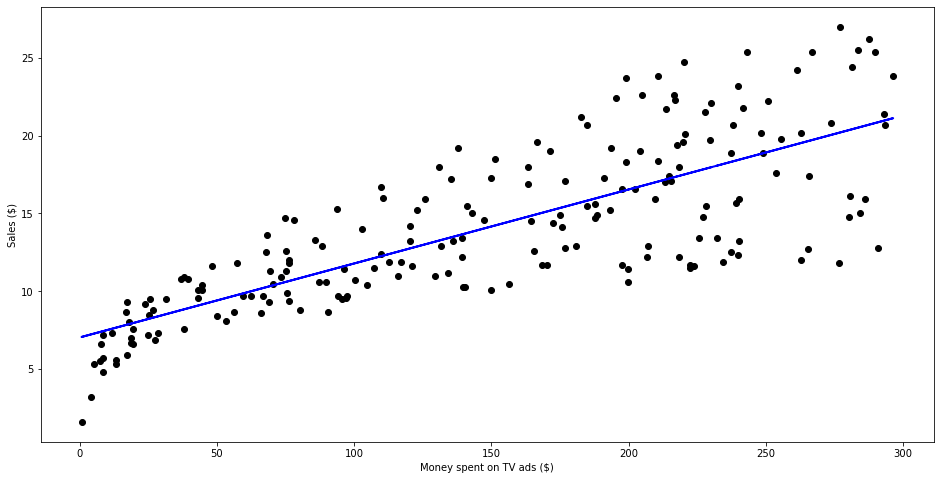

In [21]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data["TV"], data["sales"], c="black")
plt.plot(data["TV"], predictions, c="blue", linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

# Assessing the relevancy of the model

In [23]:
X = data["TV"]
y = data["sales"]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 13 May 2020   Prob (F-statistic):           1.47e-42
Time:                        17:20:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# Example 2

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [26]:
dataset = pd.read_csv("Weather.csv")

In [27]:
dataset.shape

(366, 22)

In [28]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


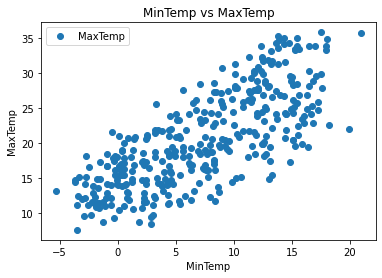

In [29]:
dataset.plot(x="MinTemp", y="MaxTemp", style="o")
plt.title("MinTemp vs MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

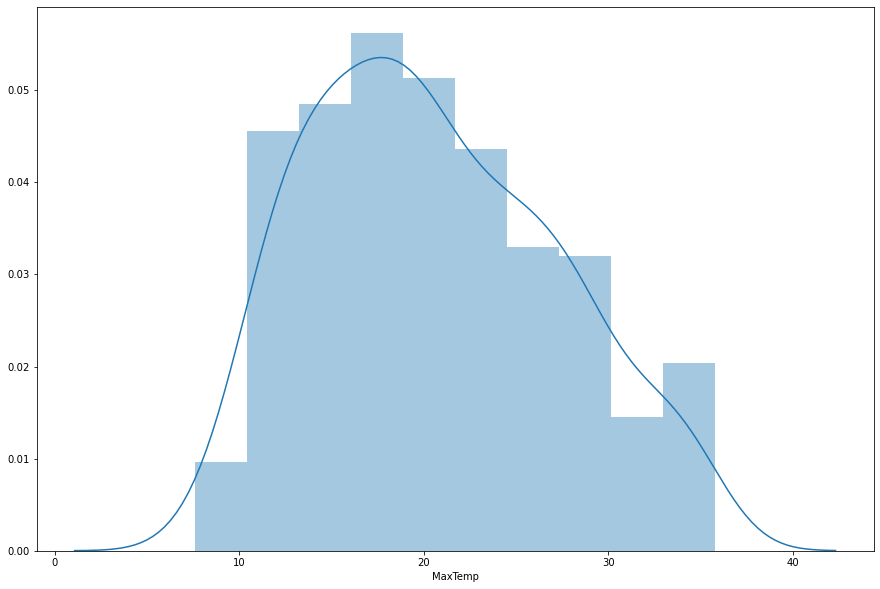

In [30]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.distplot(dataset["MaxTemp"])

In [31]:
X = dataset["MinTemp"].values.reshape(-1, 1)
y = dataset["MaxTemp"].values.reshape(-1, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # training the algorithm

LinearRegression()

In [34]:
# To retrieve the intercept:
print(regressor.intercept_)  # For retrieving the slope:
print(regressor.coef_)

[14.56202411]
[[0.81953755]]


In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


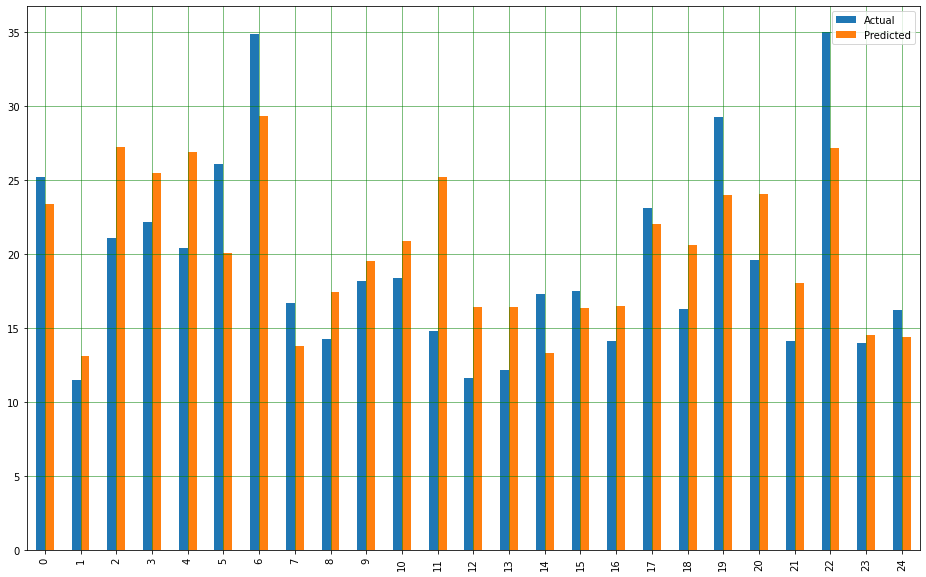

In [37]:
df1 = df.head(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

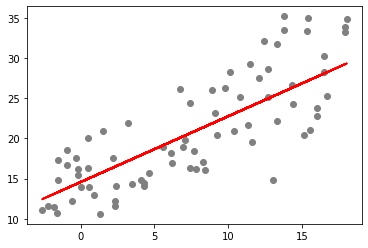

In [38]:
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [39]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096
